In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style('whitegrid')

In [8]:
df=pd.read_csv('./global_sales_data/market_fact.csv')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


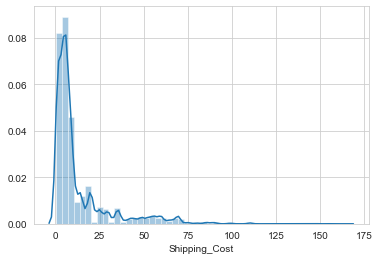

In [10]:
sns.distplot(df['Shipping_Cost'])
plt.show()

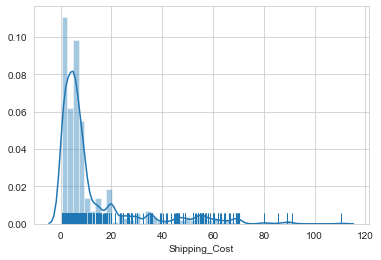

In [13]:
sns.distplot(df["Shipping_Cost"][:1000],rug=True)
plt.show()

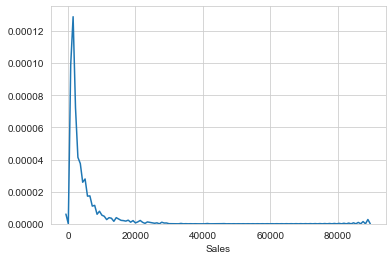

In [14]:
sns.distplot(df['Sales'],hist=False)
plt.show()

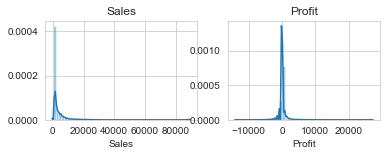

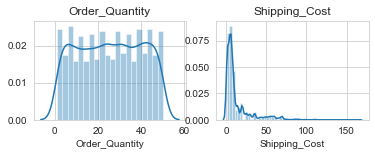

In [21]:
plt.figure(1)

plt.subplot(2,2,1)
sns.distplot(df["Sales"])
plt.title('Sales')

plt.subplot(2,2,2)
sns.distplot(df["Profit"])
plt.title('Profit')

plt.figure(2)

plt.subplot(2,2,1)
sns.distplot(df["Order_Quantity"])
plt.title('Order_Quantity')

plt.subplot(2,2,2)
sns.distplot(df["Shipping_Cost"])
plt.title('Shipping_Cost')

plt.show()

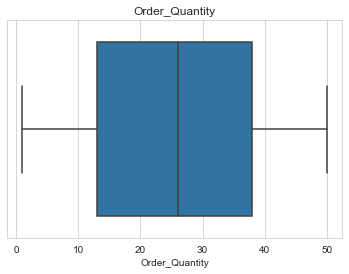

In [23]:
sns.boxplot(df["Order_Quantity"])
plt.title('Order_Quantity')
plt.show()

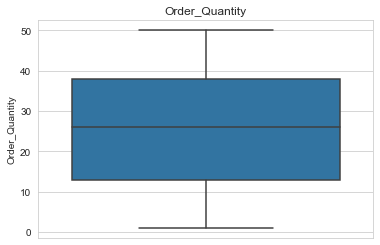

In [24]:
sns.boxplot(y=df["Order_Quantity"])
plt.title('Order_Quantity')
plt.show()

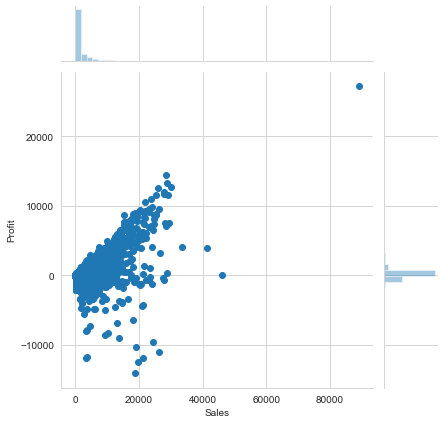

In [25]:
sns.jointplot('Sales','Profit',df)
plt.show()

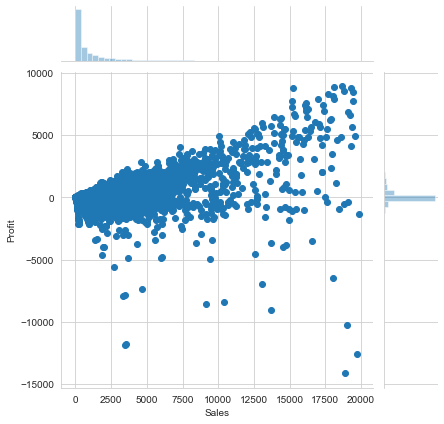

In [27]:
df=df[(df.Profit<10000) & (df.Sales<20000)]

sns.jointplot('Sales','Profit',df)
plt.show()

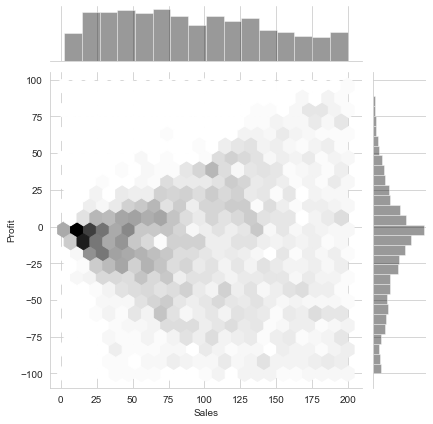

In [28]:
df=df[(df.Profit<100) & (df.Profit>-100) & (df.Sales<200)]
sns.jointplot('Sales', 'Profit', df, kind='hex', color='k')
plt.show()

In [50]:
btc=pd.read_csv('./crypto_data/bitcoin_price.csv')
ether=pd.read_csv('./crypto_data/ethereum_price.csv')
ltc=pd.read_csv('./crypto_data/litecoin_price.csv')
monero=pd.read_csv('./crypto_data/monero_price.csv')
neo=pd.read_csv('./crypto_data/neo_price.csv')
quantum=pd.read_csv('./crypto_data/qtum_price.csv')
ripple=pd.read_csv('./crypto_data/ripple_price.csv')
btc.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [51]:
btc.columns=btc.columns.map(lambda x:str(x) + '_btc')
ether.columns=ether.columns.map(lambda x:str(x) + '_ether')
ltc.columns=ltc.columns.map(lambda x:str(x) + '_ltc')
monero.columns=monero.columns.map(lambda x:str(x) + '_monero')
neo.columns=neo.columns.map(lambda x:str(x) + '_neo')
quantum.columns=quantum.columns.map(lambda x:str(x) + '_qt')
ripple.columns=ripple.columns.map(lambda x:str(x) + '_rip')

In [65]:
ether.head()

,Date_ether,Open_ether,High_ether,Low_ether,Close_ether,Volume_ether,Market Cap_ether
0,"Nov 07, 2017",298.57,304.84,290.77,294.66,"5407,66,000","28,533,300,000"
1,"Nov 06, 2017",296.43,305.42,293.72,298.89,"5793,59,000","28,322,700,000"
2,"Nov 05, 2017",300.04,301.37,295.12,296.26,"3376,58,000","28,661,500,000"
3,"Nov 04, 2017",305.48,305.48,295.80,300.47,"4164,79,000","29,175,300,000"
4,"Nov 03, 2017",288.50,308.31,287.69,305.71,"6463,40,000","27,547,400,000"


In [68]:
m1=pd.merge(btc,ether, how='inner', left_on='Date_btc', right_on='Date_ether')
m2=pd.merge(m1,ltc, how='inner', left_on='Date_btc', right_on='Date_ltc')
m3=pd.merge(m2,monero, how='inner', left_on='Date_btc', right_on='Date_monero')
m4=pd.merge(m3,neo, how='inner', left_on='Date_btc', right_on='Date_neo')
m5=pd.merge(m4,quantum, how='inner', left_on='Date_btc', right_on='Date_qt')
crypto=pd.merge(m5,ripple, how='inner', left_on='Date_btc', right_on='Date_rip')

In [69]:
curr = crypto[["Close_btc","Close_ether", "Close_ltc", "Close_monero", "Close_neo","Close_qt"]]
curr.head()

,Close_btc,Close_ether,Close_ltc,Close_monero,Close_neo,Close_qt
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


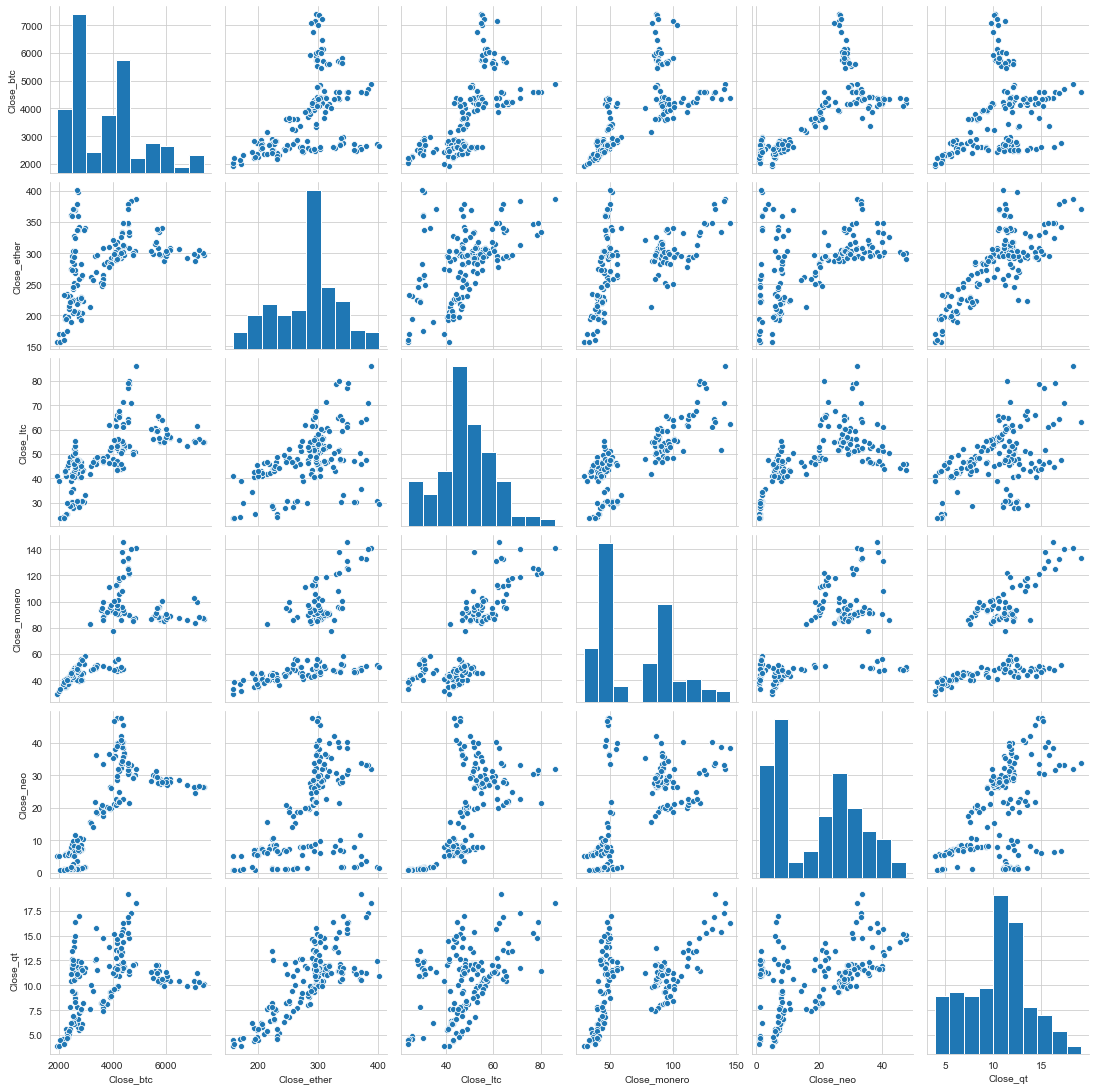

In [70]:
sns.pairplot(curr)
plt.show()

In [71]:
cor=curr.corr()

In [74]:
round(cor, 3)

,Close_btc,Close_ether,Close_ltc,Close_monero,Close_neo,Close_qt
Close_btc,1.000,0.449,0.658,0.697,0.735,0.382
Close_ether,0.449,1.000,0.490,0.539,0.482,0.791
Close_ltc,0.658,0.490,1.000,0.793,0.641,0.448
Close_monero,0.697,0.539,0.793,1.000,0.669,0.518
Close_neo,0.735,0.482,0.641,0.669,1.000,0.557
Close_qt,0.382,0.791,0.448,0.518,0.557,1.000


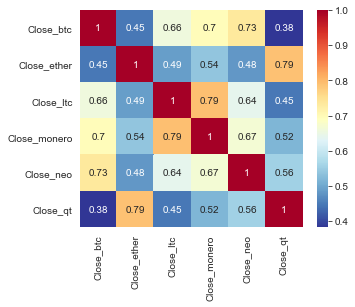

In [79]:
plt.figure(figsize=(5,4))

sns.heatmap(cor, cmap='RdYlBu_r', annot=True)
plt.show()

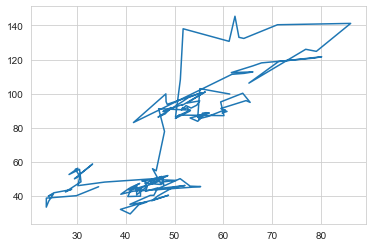

In [85]:
plt.plot(crypto['Close_ltc'], crypto['Close_monero'])
plt.show()